In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
# want to min_{{y_i}} E_X[ min_{y_i} || x - y_i || ]
# so, since we don't wanna do the math, we just take the MC estimate of this expectation
M = 1_000
samples = np.random.uniform(0, 1, size=M)

In [118]:
N = 4
rps = np.random.random(N)

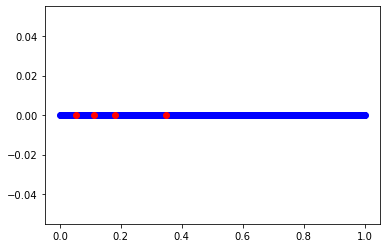

In [119]:
plt.scatter(samples, np.zeros_like(samples), color="b")
plt.scatter(rps, np.zeros_like(rps), color="r")

In [123]:
eta = 0.01
update_steps = 10_000

for _ in range(update_steps):
    displacements = np.tile(samples, (N, 1)).T - rps
    rps_idx = np.argmin(np.abs(displacements), axis=1) # which one is the current min

    for idx in range(N):
        relevant_displacements = displacements[rps_idx == idx][:,idx]
        grad = np.sum(relevant_displacements) / len(relevant_displacements)
        rps[idx] += grad * eta

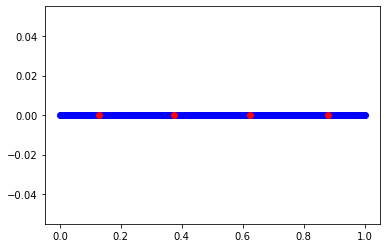

In [124]:
plt.scatter(samples, np.zeros_like(samples), color="b")
plt.scatter(rps, np.zeros_like(rps), color="r")

In [125]:
sorted(rps)

[0.12674420462788294, 0.3729987559375928, 0.6229103388258, 0.8783992645149492]